# Równania różniczkowe #

In [230]:
import numpy as np

# Metoda Eulera #
Metoda Eulera jest jedną z najprostszych metod numerycznych do rozwiązywania równań różniczkowych zwyczajnych (ODE). Polega na przybliżeniu rozwiązania równania różniczkowego poprzez iteracyjne obliczanie wartości funkcji w kolejnych punktach.
### x(i+1) = x(i) + h * f(x(i), t(i)) ###
### y(i+1) = y(i) + h * g(y(i), t(i)) ###
gdzie:
- \(x(i)\) i \(y(i)\) to wartości funkcji w punkcie \(i\),
- \(h\) to krok czasowy,
- \(f\) i \(g\) to funkcje opisujące równania różniczkowe,
- \(t(i)\) to czas w punkcie \(i\).
- Wartości początkowe \(x(0)\) i \(y(0)\) są znane / zdefiniowane.

# Przyklad do pracy #
Równanie różniczkowe:
- y'=x+y  
- y(0)=1
- x=0
- chcemy znaleźć rozwiązanie tego równania w przedziale [0, 1] z krokiem h=0.1.

In [231]:
x=0 # w sumie to nie ma znaczenia, bo to tylko przesunięcie
y=1
h=0.1

def f(x, y):
    return x + y

for i in range(10):
    y = y + h * f(x, y)
    x = x + h
    print(f"x: {x:.1f}, y: {y:.4f}")

x: 0.1, y: 1.1000
x: 0.2, y: 1.2200
x: 0.3, y: 1.3620
x: 0.4, y: 1.5282
x: 0.5, y: 1.7210
x: 0.6, y: 1.9431
x: 0.7, y: 2.1974
x: 0.8, y: 2.4872
x: 0.9, y: 2.8159
x: 1.0, y: 3.1875


In [232]:
def euler_method(f, y0, x0, h, iteration):
    x=x0
    y=y0
    for i in range(iteration):
        y = y + h * f(x, y)
        x = x + h
    return x, y

In [233]:
x, y = euler_method(f, 1, 0, 0.1, 10)
print(f"x: {x}, y: {y}")
print(f"x: {x:.1f}, y: {y:.4f}")

x: 0.9999999999999999, y: 3.1874849202
x: 1.0, y: 3.1875


Różnica pomiędzy wypisanymi powyżej wartościami wynika ze sposobu, w jaki komputer przechowuje liczby zmiennoprzecinkowe. Wartości te są przybliżone i mogą się różnić od wartości dokładnych, ponieważ nie każdej liczby można dokładnie przedstawić w postaci binarnej, co prowadzi do błędów zaokrągleń. W praktyce, dla małych kroków czasowych, różnice te są zazwyczaj niewielkie i nie mają znaczenia dla większości zastosowań numerycznych. Aby wyświetlać wartości i nie skupiać się na błędach, zdecydowałem się na formatowanie miejsc po przecinku.

# Metoda Zmodyfikowana Eulera / Metoda Heuna z iteracją #
Metoda zmodyfikowana Eulera, znana również jako metoda Heuna bez iteracji, jest udoskonaleniem standardowej metody Eulera. Zwiększa dokładność przybliżenia rozwiązania równania różniczkowego poprzez dodanie dodatkowego kroku w obliczeniach, który uwzględnia nachylenie funkcji w punkcie pośrednim.

In [234]:
x=0
y=1
h=0.1

def f(x, y):
    return x + y

for i in range(10):
    y = y + +h* f(x + h / 2, y + h / 2 * f(x, y))
    x = x + h
    print(f"x: {x:.1f}, y: {y:.4f}")

x: 0.1, y: 1.1100
x: 0.2, y: 1.2421
x: 0.3, y: 1.3985
x: 0.4, y: 1.5818
x: 0.5, y: 1.7949
x: 0.6, y: 2.0409
x: 0.7, y: 2.3231
x: 0.8, y: 2.6456
x: 0.9, y: 3.0124
x: 1.0, y: 3.4282


In [235]:
def modified_euler_method(f, y0, x0, h, iteration):
    x = x0
    y = y0
    for i in range(iteration):
        y = y + h * f(x + h / 2, y + h / 2 * f(x, y))
        x = x + h
    return x, y

In [236]:
x, y = modified_euler_method(f, 1, 0, 0.1, 10)
print(f"x: {x:.1f}, y: {y:.4f}")

x: 1.0, y: 3.4282


# Metoda Heuna #
Metoda Heun’a, znana również jako ulepszona metoda Eulera lub metoda trapezów, jest metodą numeryczną drugiego rzędu do przybliżonego rozwiązywania równań różniczkowych. Jest to metoda predyktor-korektor, która polega na uśrednieniu nachylenia w dwóch punktach, co zwiększa dokładność rozwiązania w porównaniu do zwykłej metody Eulera.

In [237]:
x = 0
y = 1
h = 0.1

def f(x, y):
    return x + y

for i in range(10):
    y = y + h /2 * (f(x, y) + f(x + h, y + h * f(x, y)))
    x = x + h
    print(f"x: {x:.1f}, y: {y:.4f}")

x: 0.1, y: 1.1100
x: 0.2, y: 1.2421
x: 0.3, y: 1.3985
x: 0.4, y: 1.5818
x: 0.5, y: 1.7949
x: 0.6, y: 2.0409
x: 0.7, y: 2.3231
x: 0.8, y: 2.6456
x: 0.9, y: 3.0124
x: 1.0, y: 3.4282


In [238]:
def heun_method(f, y0, x0, h, iteration):
    x = x0
    y = y0
    for i in range(iteration):
        y = y + h / 2 * (f(x, y) + f(x + h, y + h * f(x, y)))
        x = x + h
    return x, y

In [239]:
x, y = heun_method(f, 1, 0, 0.1, 10)
print(f"x: {x:.1f}, y: {y:.4f}")

x: 1.0, y: 3.4282


# Metoda Rungego-Kutty #
Metoda Rungego-Kutty (często nazywana RK4 ze względu na cztery oceny nachylenia) jest popularną i skuteczną metodą numeryczną czwartego rzędu do rozwiązywania równań różniczkowych zwyczajnych. Metoda ta oferuje znacznie większą dokładność niż prostsze metody, takie jak metoda Eulera czy metoda Heun’a, przy stosunkowo niewielkim wzroście złożoności obliczeniowej.

In [240]:
x = 0
y = 1
h = 0.1

def f(x, y):
    return x + y

for i in range(10):
    k1 = f(x, y)
    k2 = f(x + h / 2, y + h / 2 * k1)
    k3 = f(x + h / 2, y + h / 2 * k2)
    k4 = f(x + h, y + h * k3)
    y = y + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
    x = x + h
    print(f"x: {x:.1f}, y: {y:.4f}")

x: 0.1, y: 1.1103
x: 0.2, y: 1.2428
x: 0.3, y: 1.3997
x: 0.4, y: 1.5836
x: 0.5, y: 1.7974
x: 0.6, y: 2.0442
x: 0.7, y: 2.3275
x: 0.8, y: 2.6511
x: 0.9, y: 3.0192
x: 1.0, y: 3.4366


In [241]:
def runge_kutta_method(f, y0, x0, h, iteration):
    x = x0
    y = y0
    for i in range(iteration):
        k1 = f(x, y)
        k2 = f(x + h / 2, y + h / 2 * k1)
        k3 = f(x + h / 2, y + h / 2 * k2)
        k4 = f(x + h, y + h * k3)
        y = y + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        x = x + h
    return x, y

In [242]:
x, y = runge_kutta_method(f, 1, 0, 0.1, 10)
print(f"x: {x:.1f}, y: {y:.4f}")

x: 1.0, y: 3.4366


# Porównanie metod #

In [243]:
from scipy.integrate import solve_ivp

def scipy_method(method_name):
    def solve(f, y0, x0, h, iteration):
        t_eval = np.arange(x0, x0 + h * iteration , iteration + 1)
        sol = solve_ivp(f, [x0, x0 + h * iteration], [y0], method=method_name, t_eval=t_eval)
        return sol.t[-1], sol.y[0, -1]
    return solve

list_of_methods = {
    "Euler": euler_method,
    "Modified Euler": modified_euler_method,
    "Heun": heun_method,
    "Runge-Kutta": runge_kutta_method,
    "SciPy RK45": scipy_method("RK45"),
    "SciPy RK23": scipy_method("RK23")
}

for method_name, method in list_of_methods.items():
    x, y = method(f, 1, 0, 0.1, 10)
    print(f"{method_name} - x: {x:.1f}, y: {y:.4f}")

Euler - x: 1.0, y: 3.1875
Modified Euler - x: 1.0, y: 3.4282
Heun - x: 1.0, y: 3.4282
Runge-Kutta - x: 1.0, y: 3.4366
SciPy RK45 - x: 0.0, y: 1.0000
SciPy RK23 - x: 0.0, y: 1.0000


### Zauważam że moje poprzednie metody nie są zbyt uniwersalne, i utrudnią mi zbieranie danych do wykresu. Więc przerabiam je i sprawdzam kompatybilność ze starszą wersją. ###

In [244]:
def euler_method_single_step(f, y0, x0, h):
    x = x0
    y = y0
    y = y + h * f(x, y)
    x = x + h
    return x, y

def modified_euler_method_single_step(f, y0, x0, h):
    x = x0
    y = y0
    y = y + h * f(x + h / 2, y + h / 2 * f(x, y))
    x = x + h
    return x, y

def heun_method_single_step(f, y0, x0, h):
    x = x0
    y = y0
    y = y + h / 2 * (f(x, y) + f(x + h, y + h * f(x, y)))
    x = x + h
    return x, y

def runge_kutta_method_single_step(f, y0, x0, h):
    x = x0
    y = y0
    k1 = f(x, y)
    k2 = f(x + h / 2, y + h / 2 * k1)
    k3 = f(x + h / 2, y + h / 2 * k2)
    k4 = f(x + h, y + h * k3)
    y = y + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
    x = x + h
    return x, y

def scipy_method_single_step(method_name):
    def solve(f, y0, x0, h):
        t_eval = np.array([x0, x0 + h])
        sol = solve_ivp(f, [x0, x0 + h], [y0], method=method_name, t_eval=t_eval)
        return sol.t[-1], sol.y[0, -1]
    return solve


In [245]:
x0 = 0
y0 = 1
h = 0.1
iteration = 10 

def make_iterative(method_single_step):
    def multi_step_method(f, y0, x0, h, iteration):
        x = x0
        y = y0
        for _ in range(iteration):
            x, y = method_single_step(f, y, x, h)
        return x, y
    return multi_step_method

old_methods = {
    "Euler": euler_method,
    "Modified Euler": modified_euler_method,
    "Heun": heun_method,
    "Runge-Kutta": runge_kutta_method,
    "SciPy RK45": scipy_method("RK45"),
    "SciPy RK23": scipy_method("RK23")
}

new_methods = {
    "Euler": make_iterative(euler_method_single_step),
    "Modified Euler": make_iterative(modified_euler_method_single_step),
    "Heun": make_iterative(heun_method_single_step),
    "Runge-Kutta": make_iterative(runge_kutta_method_single_step),
    "SciPy RK45": make_iterative(scipy_method_single_step("RK45")),
    "SciPy RK23": make_iterative(scipy_method_single_step("RK23"))
}

print(f"{'Method':<15} | {'Old y':>10} | {'New y':>10} | {'Diff':>10}")
print("-" * 50)

for name in old_methods:
    _, y_old = old_methods[name](f, y0, x0, h, iteration)
    _, y_new = new_methods[name](f, y0, x0, h, iteration)
    diff = abs(y_old - y_new)
    print(f"{name:<15} | {y_old:10.6f} | {y_new:10.6f} | {diff:10.2e}")


Method          |      Old y |      New y |       Diff
--------------------------------------------------
Euler           |   3.187485 |   3.187485 |   0.00e+00
Modified Euler  |   3.428162 |   3.428162 |   0.00e+00
Heun            |   3.428162 |   3.428162 |   0.00e+00
Runge-Kutta     |   3.436559 |   3.436559 |   0.00e+00
SciPy RK45      |   1.000000 |   3.436564 |   2.44e+00
SciPy RK23      |   1.000000 |   3.436466 |   2.44e+00


# Przechodze do tworzenia wykresów #

# y'= f(x, y) = 4x/(1+x^2)^(1/3) #
- przedzał [-2,2]
- wartość początkowa y(-2)=6
- kroki h=0.5, 0.1, 0.01

In [246]:
method_names ={
    "Euler": euler_method_single_step,
    "Modified Euler": modified_euler_method_single_step,
    "Heun": heun_method_single_step,
    "Runge-Kutta": runge_kutta_method_single_step,
    "SciPy RK45": scipy_method_single_step("RK45"),
    "SciPy RK23": scipy_method_single_step("RK23")
}

def make_method_iterative_and_return_list(method_single_step):
    def multi_step_method(f, y0, x0, h, iteration):
        x = x0
        y = y0
        results = [(x, y)]
        for _ in range(iteration):
            x, y = method_single_step(f, y, x, h)
            results.append((x, y))
        return results
    return multi_step_method

In [247]:
def f(x, y):
    return 4 * x / (1 + x**2)**(1/3)

In [248]:
def g(x):
    return 3*(1 + x**2)**(2/3) - 2.772
    

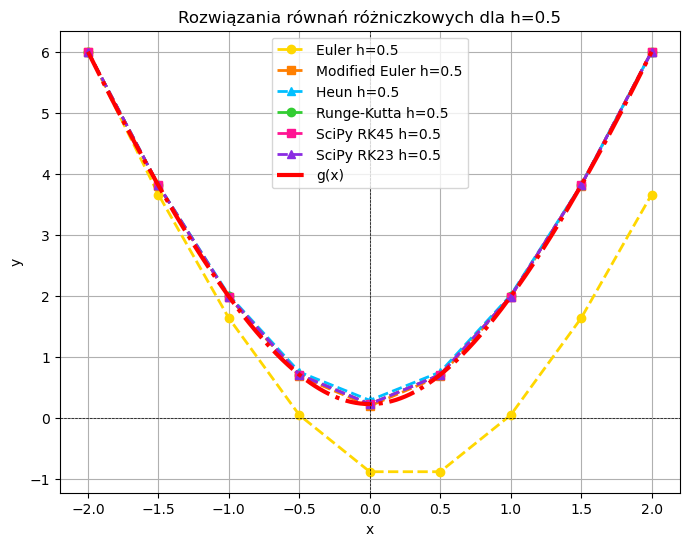

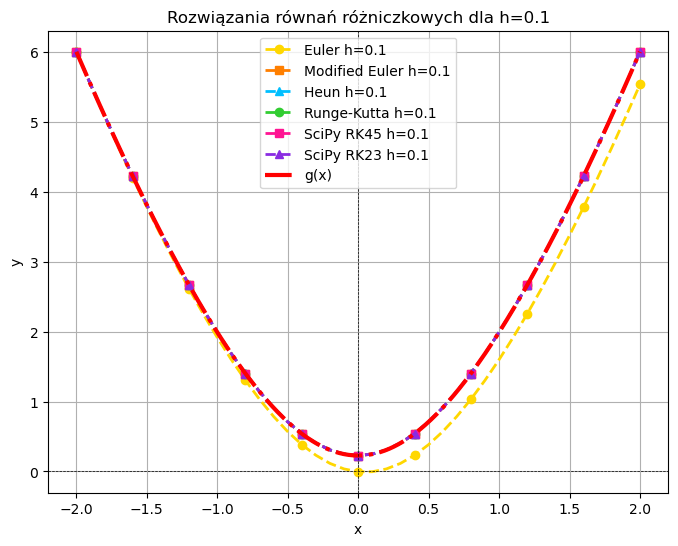

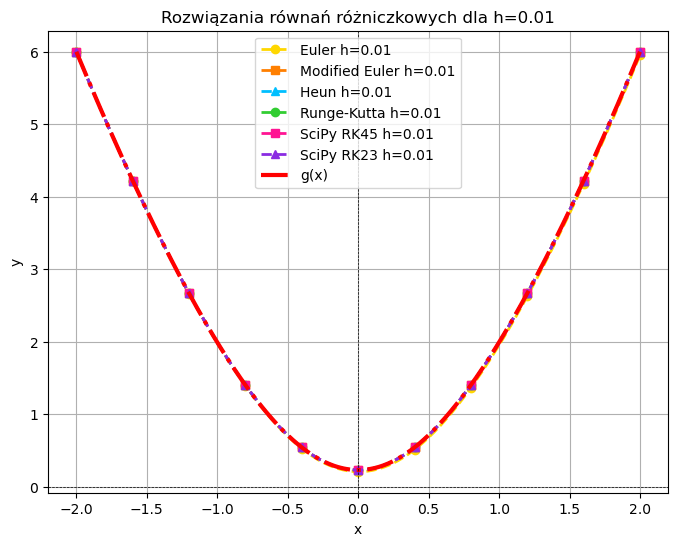

In [249]:
import matplotlib.pyplot as plt
import numpy as np

def g(x):
    return 3*(1 + x**2)**(2/3) - 2.772

x0 = -2
y0 = 6
h_values = [0.5, 0.1, 0.01]
iteration = [8, 40, 400]


methods = {name: make_method_iterative_and_return_list(method) for name, method in method_names.items()}

results = {name: [] for name in methods.keys()}
for h, it in zip(h_values, iteration):
    for name, method in methods.items():
        results[name].append(method(f, y0, x0, h, it))

line_styles = ['--']
markers = ['o', 's', '^']

bright_colors = [
    '#FFD700',  
    '#FF7F00',  
    '#00BFFF', 
    '#32CD32',  
    '#FF1493',  
    '#8A2BE2'   
]
for i, h in enumerate(h_values):
    plt.figure(figsize=(8, 6))
    
    for idx, (name, result_list) in enumerate(results.items()):
        x_values, y_values = zip(*result_list[i])
        plt.plot(
            x_values, y_values,
            label=f"{name} h={h}",
            linestyle=line_styles[idx % len(line_styles)],
            marker=markers[idx % len(markers)],
            markevery=max(1, len(x_values)//10), 
            linewidth=2,
            color=bright_colors[idx % len(bright_colors)]
        )

    x_g = np.linspace(min(x_values), max(x_values), 500)
    y_g = g(x_g)
    plt.plot(x_g, y_g, 'r-.', linewidth=3, label='g(x)') 

    plt.title(f"Rozwiązania równań różniczkowych dla h={h}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.axvline(0, color='black', lw=0.5, ls='--')
    plt.legend()
    plt.grid()
    plt.show()


# Wnioski #
- widzimy, że im mniejszy krok h, tym lepsze dopasowanie do funkcji g(x)
- metoda Eulera jest najgorsza, jej wykres najbardziej odbiega od funkcji g(x)
- dla h=0.01 wszystkie metody są bardzo zbliżone do funkcji g(x)

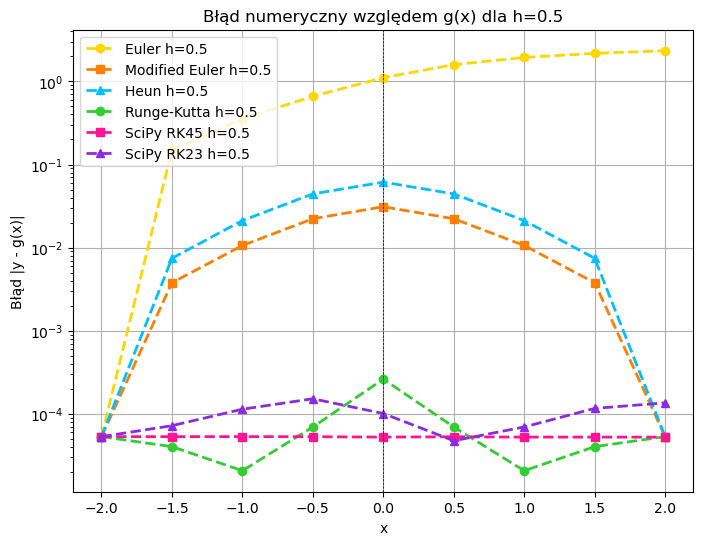

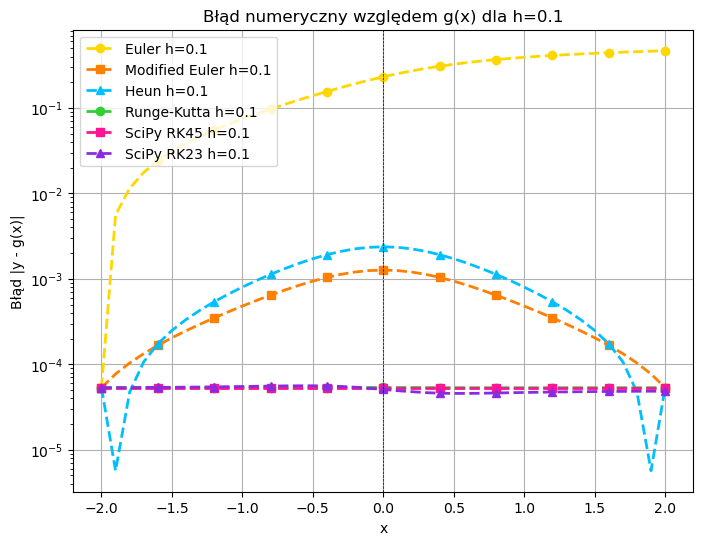

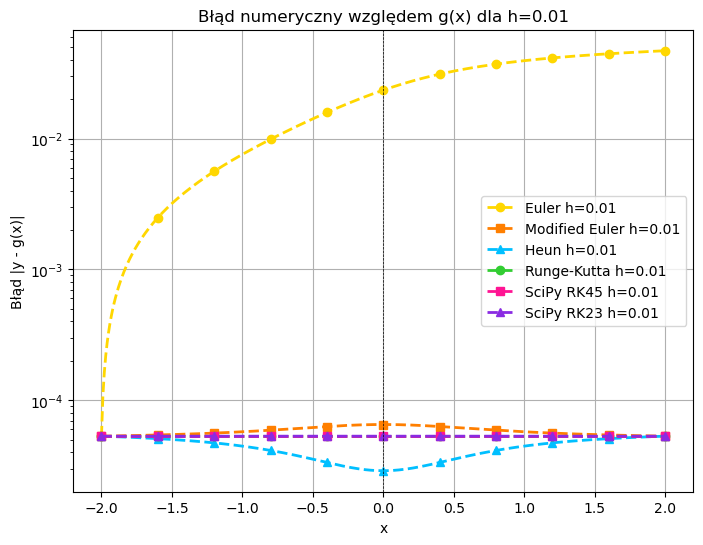

In [288]:
for i, h in enumerate(h_values):
    plt.figure(figsize=(8, 6))

    for idx, (name, result_list) in enumerate(results.items()):
        x_values, y_values = zip(*result_list[i])
        y_expected = g(np.array(x_values))
        error = np.abs(np.array(y_values) - y_expected)

        plt.plot(
            x_values, error,
            label=f"{name} h={h}",
            linestyle=line_styles[idx % len(line_styles)],
            marker=markers[idx % len(markers)],
            markevery=max(1, len(x_values)//10),
            linewidth=2,
            color=bright_colors[idx % len(bright_colors)]
        )

    plt.title(f"Błąd numeryczny względem g(x) dla h={h}")
    plt.xlabel("x")
    plt.ylabel("Błąd |y - g(x)|")
    plt.yscale("log")  
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.axvline(0, color='black', lw=0.5, ls='--')
    plt.legend()
    plt.grid()
    plt.show()


# Wykresy błędów - Wnioski #
- widzimy, że dla mniejszych kroków h błąd jest mniejszy
- metoda Eulera ma największy błąd 
- widzimy ze metoda Rungego-Kutty jest najlepsza, jej błąd jest najmniejszy, jest ona też porównywalna z metodami SciPy
- metoda Heuna jest lepsza od metody Eulera, ale gorsza od Rungego-Kutty
- metoda zmodyfikowana Eulera jest lepsza od metody Eulera, ale gorsza od Heuna
- metody SciPy są porównywalne z metodą Rungego-Kutty, i mają mniejszy błąd dla mniejszych kroków h

# Przedstawienie największych błędów dla każdej metody i kroku h #

In [290]:
from tabulate import tabulate

print("\n" + "="*50)
print("TABELKI – Największy błąd dla każdej metody i h")
print("="*50)

for i, h in enumerate(h_values):
    table_data = []

    for name, result_list in results.items():
        x_vals, y_vals = zip(*result_list[i])
        y_expected = g(np.array(x_vals))
        error = np.abs(np.array(y_vals) - y_expected)
        max_err = np.max(error)
        table_data.append([name, f"{max_err:.5e}"])  

    table = tabulate(
        table_data,
        headers=["Metoda", f"Maksymalny błąd (h={h})"],
        tablefmt="grid" 
    )

    print(f"\nDla h = {h}:\n{table}")



TABELKI – Największy błąd dla każdej metody i h

Dla h = 0.5:
+----------------+---------------------------+
| Metoda         |   Maksymalny błąd (h=0.5) |
+================+===========================+
| Euler          |               2.33927     |
+----------------+---------------------------+
| Modified Euler |               0.0310711   |
+----------------+---------------------------+
| Heun           |               0.0613549   |
+----------------+---------------------------+
| Runge-Kutta    |               0.000262398 |
+----------------+---------------------------+
| SciPy RK45     |               5.32508e-05 |
+----------------+---------------------------+
| SciPy RK23     |               0.000152024 |
+----------------+---------------------------+

Dla h = 0.1:
+----------------+---------------------------+
| Metoda         |   Maksymalny błąd (h=0.1) |
+================+===========================+
| Euler          |               0.467896    |
+----------------+------------

Wyniki tabeli pokazują maksymalne błędy dla każdej metody numerycznej przy różnych krokach h. Możemy zauważyć, że:
- Metoda Eulera ma największy błąd we wszystkich krokach h, co potwierdza jej niską dokładność.
- pozostałe metody (zmodyfikowana Eulera, Heun, Runge-Kutta) mają znacznie mniejsze błędy, a metoda Runge-Kutty jest najlepsza.
- pozstałe wnioski z wykresów są potwierdzone.

In [268]:
from tabulate import tabulate

def g(x):
    return 3 * (1 + x**2)**(2/3) - 2.772

list_of_methods = {
    "Euler": euler_method,
    "Modified Euler": modified_euler_method,
    "Heun": heun_method,
    "Runge-Kutta": runge_kutta_method,
    "SciPy RK45": scipy_method("RK45"),
    "SciPy RK23": scipy_method("RK23")
}

analytical_y = g(6)

table1 = []
for method_name, method in list_of_methods.items():
    result = method(f, 6, -2, 0.5, 8)
    x, y, *rest = result
    table1.append([method_name + " h= 0.5", f"{x:.1f}", f"{y:.4f}"])
for method_name, method in list_of_methods.items():
    result = method(f, 6, -2, 0.1, 40)
    x, y, *rest = result
    table1.append([method_name + " h= 0.1", f"{x:.1f}", f"{y:.4f}"])
for method_name, method in list_of_methods.items():
    result = method(f, 6, -2, 0.01, 400)
    x, y, *rest = result
    table1.append([method_name + " h= 0.1", f"{x:.1f}", f"{y:.4f}"])
    
table1.append(["Analytical ", f"{2:.1f}", f"{g(2):.4f}"])
    
print(tabulate(table1, headers=["Method Name", "x", "y"], tablefmt="grid"))

+-----------------------+-----+--------+
| Method Name           |   x |      y |
+=======================+=====+========+
| Euler h= 0.5          |   2 | 3.6608 |
+-----------------------+-----+--------+
| Modified Euler h= 0.5 |   2 | 6      |
+-----------------------+-----+--------+
| Heun h= 0.5           |   2 | 6      |
+-----------------------+-----+--------+
| Runge-Kutta h= 0.5    |   2 | 6      |
+-----------------------+-----+--------+
| SciPy RK45 h= 0.5     |  -2 | 6      |
+-----------------------+-----+--------+
| SciPy RK23 h= 0.5     |  -2 | 6      |
+-----------------------+-----+--------+
| Euler h= 0.1          |   2 | 5.5322 |
+-----------------------+-----+--------+
| Modified Euler h= 0.1 |   2 | 6      |
+-----------------------+-----+--------+
| Heun h= 0.1           |   2 | 6      |
+-----------------------+-----+--------+
| Runge-Kutta h= 0.1    |   2 | 6      |
+-----------------------+-----+--------+
| SciPy RK45 h= 0.1     |  -2 | 6      |
+---------------

W powyższej tabeli przedstawiono wyniki dla różnych metod numerycznych przy różnych krokach h. Wartości x są takie same dla wszystkich metod, ponieważ są one obliczane na tym samym przedziale. Wartości y różnią się w zależności od metody i kroku h, co pokazuje, jak różne metody wpływają na dokładność rozwiązania równania różniczkowego. Ostatecznie, wartość analityczna jest podana jako punkt odniesienia.Widzimy, że błąd wystepujący w metodzie Eulera jest największy co doporowadziło do tego, że wartość y jest znacznie różna od wartości analitycznej. Metoda Rungego-Kutty daje najlepsze wyniki, a jej wartość y jest bardzo bliska wartości analitycznej i pozostałych metod.

# Podsumowanie: #
- Metoda Eulera jest najprostsza, ale ma największy błąd.
- Metoda zmodyfikowana Eulera jest lepsza od Eulera, ale gorsza od Heuna.
- Metoda Heuna jest lepsza od zmodyfikowanej Eulera, ale gorsza od Rungego-Kutty.
- Metoda Rungego-Kutty jest najlepsza, ma najmniejszy błąd i jest porównywalna z metodami SciPy.
- Metody SciPy (RK45 i RK23) są porównywalne z Rungego-Kutty, ale mają mniejszy błąd dla mniejszych kroków h.
- Dla mniejszych kroków h wszystkie metody są bardziej zbliżone do wartości analitycznej funkcji g(x).
- Wartości y dla różnych metod i kroków h różnią się, co pokazuje, jak różne metody wpływają na dokładność rozwiązania równania różniczkowego.
- Myślę, żę każda z tych metod jest bardzo fajną opcją do rozwiązywania równań różniczkowych, ale w praktyce najczęściej używa się metody Rungego-Kutty lub metod SciPy, ponieważ są one bardziej dokładne i stabilne.
- Z drugiej strony, metoda Eulera jest bardzo prosta i szybka, więc może być używana do szybkich obliczeń lub w sytuacjach, gdzie dokładność nie jest kluczowa.

### Poniżęj znajduje się kod do generowania tabeli z wartościami i błędami dla każdej metody i kroku h. ###
Wolałem to dodać na wszelki wypadek aby nie stracić punktów.

In [285]:
from tabulate import tabulate

def g(x):
    return 3 * (1 + x**2)**(2/3) - 2.772

for i, h in enumerate(h_values):
    method_names_list = list(results.keys())
    x_vals = [x for x, _ in results[method_names_list[0]][i]]

    headers_values = ["x", "oczekiwane"] + method_names_list
    table_values = []

    headers_errors = ["x"] + [f"{name} err" for name in method_names_list]
    table_errors = []

    num_points = len(x_vals)
    for j in range(num_points):
        x = x_vals[j]
        exact = g(x)

        row_values = [f"{x:.2f}", f"{exact:.5f}"]
        row_errors = [f"{x:.2f}"]

        for method_name in method_names_list:
            _, y_vals = zip(*results[method_name][i])
            y = y_vals[j]
            error = abs(y - exact)

            row_values.append(f"{y:.5f}")
            row_errors.append(f"{error:.2e}")

        table_values.append(row_values)
        table_errors.append(row_errors)

    print(f"h = {h} - Values")
    print(tabulate(table_values, headers=headers_values, tablefmt="fancy_grid"))
    print()
    print(f"h = {h} - Errors")
    print(tabulate(table_errors, headers=headers_errors, tablefmt="fancy_grid"))
    print()


h = 0.5 - Values
╒══════╤══════════════╤══════════╤══════════════════╤═════════╤═══════════════╤══════════════╤══════════════╕
│    x │   oczekiwane │    Euler │   Modified Euler │    Heun │   Runge-Kutta │   SciPy RK45 │   SciPy RK23 │
╞══════╪══════════════╪══════════╪══════════════════╪═════════╪═══════════════╪══════════════╪══════════════╡
│ -2   │      6.00005 │  6       │          6       │ 6       │       6       │      6       │      6       │
├──────┼──────────────┼──────────┼──────────────────┼─────────┼───────────────┼──────────────┼──────────────┤
│ -1.5 │      3.81029 │  3.66079 │          3.8065  │ 3.81773 │       3.81025 │      3.81023 │      3.81022 │
├──────┼──────────────┼──────────┼──────────────────┼─────────┼───────────────┼──────────────┼──────────────┤
│ -1   │      1.9902  │  1.63547 │          1.97959 │ 2.01137 │       1.99018 │      1.99015 │      1.99009 │
├──────┼──────────────┼──────────┼──────────────────┼─────────┼───────────────┼──────────────┼─────────